In [1]:
!pip install d2l


     |████████████████████████████████| 82 kB 535 kB/s 
     |████████████████████████████████| 11.6 MB 22.2 MB/s 
     |████████████████████████████████| 61 kB 7.0 MB/s 
     |████████████████████████████████| 20.1 MB 5.6 MB/s 
     |████████████████████████████████| 9.9 MB 43.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the p

In [16]:
import random
import torch
from d2l import torch as d2l

In [17]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([ 0.7593402  -0.42137024], shape=(2,), dtype=float32) 
label: tf.Tensor([7.148571], shape=(1,), dtype=float32)


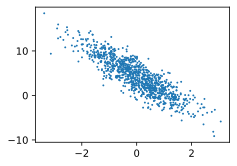

In [12]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [18]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0145,  0.3507],
        [-0.1385,  0.6883],
        [-0.5707,  0.8887],
        [ 1.2048,  0.0745],
        [-0.0255,  1.5602],
        [-0.5231, -0.7574],
        [-1.6183,  1.0153],
        [-1.2409, -0.0474],
        [-0.3282, -0.0698],
        [-1.0217, -0.7872]]) 
 tensor([[ 3.0348],
        [ 1.5810],
        [ 0.0384],
        [ 6.3435],
        [-1.1643],
        [ 5.7248],
        [-2.5152],
        [ 1.8818],
        [ 3.7621],
        [ 4.8387]])


In [19]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [22]:
def linreg(X, w, b):  #save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [23]:
def squared_loss(y_hat, y):  #save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [24]:
def sgd(params, lr, batch_size):  #save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.052244
epoch 2, loss 0.000231
epoch 3, loss 0.000047


In [26]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0004, -0.0007], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0009], grad_fn=<RsubBackward1>)
